# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 36.15 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [23]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [24]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

# Importar Tensorflow

In [25]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [26]:
session = tf.Session()

# Entrenamiento estocástico y por bloques

In [27]:
import numpy as np
import matplotlib.pyplot as plt
batch_size = 25

In [28]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [29]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [30]:
my_prediction = tf.matmul(x_data, A)

In [31]:
loss = tf.reduce_mean(tf.square(my_prediction-y_target))

In [32]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_optimizer.minimize(loss)

In [33]:
init = tf.global_variables_initializer()

In [34]:
session.run(init)

In [35]:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A=[[2.2339423]]
Loss: 59.610184
Paso #10 A=[[3.991985]]
Loss: 36.626617
Paso #15 A=[[5.346913]]
Loss: 23.966354
Paso #20 A=[[6.380229]]
Loss: 13.4728365
Paso #25 A=[[7.1810207]]
Loss: 9.937557
Paso #30 A=[[7.804082]]
Loss: 5.1019993
Paso #35 A=[[8.264724]]
Loss: 3.4351108
Paso #40 A=[[8.645336]]
Loss: 2.6545243
Paso #45 A=[[8.936667]]
Loss: 1.7046368
Paso #50 A=[[9.146639]]
Loss: 1.3305316
Paso #55 A=[[9.2965555]]
Loss: 1.4583042
Paso #60 A=[[9.424828]]
Loss: 1.1166731
Paso #65 A=[[9.526845]]
Loss: 1.151485
Paso #70 A=[[9.625617]]
Loss: 0.8224942
Paso #75 A=[[9.671308]]
Loss: 1.3243887
Paso #80 A=[[9.735083]]
Loss: 1.0626152
Paso #85 A=[[9.769479]]
Loss: 1.090676
Paso #90 A=[[9.8153715]]
Loss: 1.1622324
Paso #95 A=[[9.840416]]
Loss: 1.0255852
Paso #100 A=[[9.839465]]
Loss: 1.185034
Paso #105 A=[[9.827633]]
Loss: 1.4387181
Paso #110 A=[[9.84294]]
Loss: 1.0328616
Paso #115 A=[[9.844725]]
Loss: 1.2885311
Paso #120 A=[[9.86895]]
Loss: 1.332847
Paso #125 A=[[9.885101]]
Loss: 0.92433

In [36]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5 A=[[9.822548]]
Loss: 1.306095
Paso #10 A=[[9.913481]]
Loss: 4.263664
Paso #15 A=[[9.929444]]
Loss: 0.2324218
Paso #20 A=[[9.990671]]
Loss: 0.18895
Paso #25 A=[[9.67467]]
Loss: 0.048279345
Paso #30 A=[[9.826653]]
Loss: 0.03350666
Paso #35 A=[[9.770918]]
Loss: 0.52272564
Paso #40 A=[[9.80481]]
Loss: 0.4195787
Paso #45 A=[[9.919539]]
Loss: 0.32678974
Paso #50 A=[[9.980842]]
Loss: 0.23024853
Paso #55 A=[[10.091979]]
Loss: 0.11403413
Paso #60 A=[[10.186948]]
Loss: 1.7620951
Paso #65 A=[[10.099575]]
Loss: 0.16161354
Paso #70 A=[[9.8389635]]
Loss: 2.0983255
Paso #75 A=[[9.922165]]
Loss: 3.061552
Paso #80 A=[[9.638828]]
Loss: 0.060784828
Paso #85 A=[[9.618076]]
Loss: 0.041006003
Paso #90 A=[[9.703458]]
Loss: 2.8761318
Paso #95 A=[[9.70563]]
Loss: 0.34558064
Paso #100 A=[[9.933331]]
Loss: 0.06714515
Paso #105 A=[[10.035288]]
Loss: 2.7412343
Paso #110 A=[[10.108631]]
Loss: 0.026956573
Paso #115 A=[[10.212598]]
Loss: 1.5660449
Paso #120 A=[[10.122065]]
Loss: 0.059564605
Paso #125 A=[[9.95

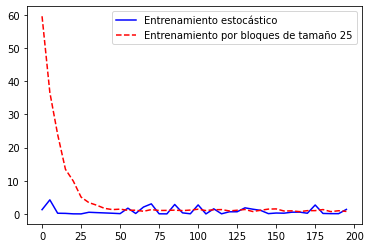

In [37]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label = "Entrenamiento estocástico")
plt.plot(range(0,200,5), loss_batch, 'r--', label = "Entrenamiento por bloques de tamaño 25")
plt.legend(loc="upper right", prop={'size':10})
plt.show()